## Week 4 exercise
regression and correlation

In [194]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Part 1. Regression using noisy data

In [107]:
# number of data points
N=100
# generate x values from 1 to N
x=np.arange(1,N+1,1)
# y=0.5*x + noise
err=50
y=0.5*x+err*(np.random.rand(N)-0.5)

# set-up A matrix to estimate linear fit
# Ax=b
# first column of A: x
# second column of A: 1
A=np.matrix([x,np.ones(N)]).T
b=np.matrix(y).T # get a column vector of y

# estimate coefficient using pseudo inverse
xvec=np.linalg.pinv(A)@b
print('Part 1. fit noisy data')
print('Estimated based on matrix pseudo inverse:')
print(f'The best fit line is y = {xvec[0,0]:4.3} x + {xvec[1,0]:4.3}')



Part 1. fit noisy data
Estimated based on matrix pseudo inverse:
The best fit line is y = 0.484 x + -0.233


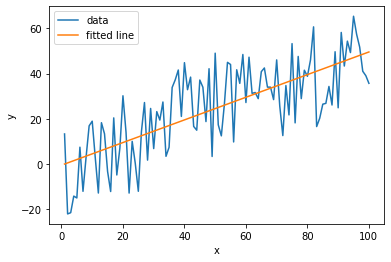

In [64]:
# make a plot
plt.plot(x,y,label='data') # plot the data
plt.plot(x,A@xvec,'-',label='fitted line') # plot the fitting line

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [73]:
# estimating regression coefficient using covariance matrix
# y = ax + b
# we use the same x and y generated from the previous section
# assemble a matrix
D = np.matrix([x,y]) # first row x, second row y
# calculate the covariance matrix
c = np.cov(D)
# calculate the regression coefficient a (slope)
a = c[0,1]/c[0,0]
# estimated the intercept
b = np.mean(y) - a*np.mean(x)

print(' ')
print('Estimated based on covariance matrix:');
print(f'The best fit line is y = {a:4.3} x + {b:4.3}');

 
Estimated based on covariance matrix:
The best fit line is y = 0.501 x + -0.501


In [79]:
# estimating correlation coefficient

# coefficient of determination
# R^2 value measures the fraction of variance explained by the regression

R2=c[0,1]**2/(c[0,0]*c[1,1])
print(f'R^2 = {R2:5.4}')
print(f'{R2*100:5.4}% of the variance is explained by the linear trend.');


R^2 = 0.531
 53.1% of the variance is explained by the linear trend.


### Part 2. Atlanta temperature


In [87]:
# import data (with missing values)
df=pd.read_excel('./ATL_MonMeanTemp_1879_2022_with_missing.xlsx',skiprows=1)
# replace M with NaN
df=df.replace('M', np.nan)
# year
year=df.Year
# temperature of all months
All_Month=df.iloc[:,1:13]
# calculate annual mean from all months data
Annual=All_Month.mean(axis=1,skipna=False) # as the first year data has a lot missing, here I chose to not skipping NaN
Annual


0            NaN
1      61.758333
2      62.300000
3      62.358333
4      62.316667
         ...    
141    66.141667
142    64.758333
143    64.541667
144    64.566667
145          NaN
Length: 146, dtype: float64

In [133]:
# calculate the regression coefficients
# all data (exclude missing)
ind = ~np.isnan(Annual)

x=np.array(year[ind])
y=np.array(Annual[ind])

# assemble the matrix [x,y]
D=np.matrix([x,y])

# calculate the covariance matrix
c = np.cov(D)
# calculate the regression coefficient a (slope)
a = c[0,1]/c[0,0]
# estimated the intercept
b = np.mean(y) - a*np.mean(x)

r2=(c[0,1]**2)/(c[0,0]*c[1,1]);

print('Part 2: Atlanta temperature ')
print('Estimated based on covariance matrix:');
print(f'The temperature changes {a:4.3} deg F per year.');
print(f'The R^2 value is {r2:4.3}.');
print(f'{r2*100:4.3}% of the variance is explained by the linear trend.');


Part 2: Atlanta temperature 
Estimated based on covariance matrix:
The temperature changes 0.017 deg F per year.
The R^2 value is 0.245.
24.5% of the variance is explained by the linear trend.


In [126]:
# validate using pseudo inverse of matrix
# set-up A matrix to estimate linear fit
# Ax=b
# first column of A: x
# second column of A: 1

x=np.array(year[ind])
y=np.array(Annual[ind])

# number of data points
N=np.size(x)

# assemble matrix
A=np.matrix([x,np.ones(N)]).T
b=np.matrix(y).T # get a column vector of y

# estimate coefficient using pseudo inverse
xvec=np.linalg.pinv(A)@b

print('Estimated based on matrix pseudo inverse:')
print(f'The best fit line is y = {xvec[0,0]:4.3} x + {xvec[1,0]:4.3}')
print(f'The temperature changes {xvec[0,0]:4.3} deg F per year.');


Estimated based on matrix pseudo inverse:
The best fit line is y = 0.017 x + 28.7
The temperature changes 0.017 deg F per year.


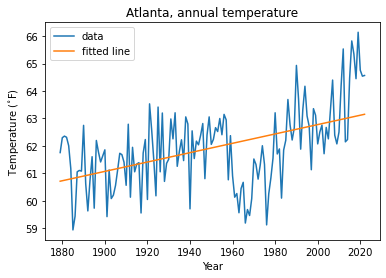

In [120]:
# make a plot
plt.plot(year,Annual,label='data') # plot the data
plt.plot(x,A@xvec,'-',label='fitted line') # plot the fitting line

plt.xlabel('Year')
plt.ylabel('Temperature ($^{\circ}$F)')
plt.title('Atlanta, annual temperature');
plt.legend()
plt.show()

In [136]:
# run regression for a selected period (after 1970)
ind = (~np.isnan(Annual)) & (year>=1970)

x=np.array(year[ind])
y=np.array(Annual[ind])

# assemble the matrix [x,y]
D=np.matrix([x,y])

# calculate the covariance matrix
c = np.cov(D)
# calculate the regression coefficient a (slope)
a = c[0,1]/c[0,0]
# estimated the intercept
b = np.mean(y) - a*np.mean(x)

r2=(c[0,1]**2)/(c[0,0]*c[1,1]);

print('Regression for a selected period (after 1970) ')
print('Estimated based on covariance matrix:');
print(f'The temperature changes {a:4.3} deg F per year (after 1970).');
print(f'The R^2 value is {r2:4.3}.');
print(f'{r2*100:4.3}% of the variance is explained by the linear trend.');


Regression for a selected period (after 1970) 
Estimated based on covariance matrix:
The temperature changes 0.0693 deg F per year (after 1970).
The R^2 value is 0.496.
49.6% of the variance is explained by the linear trend.


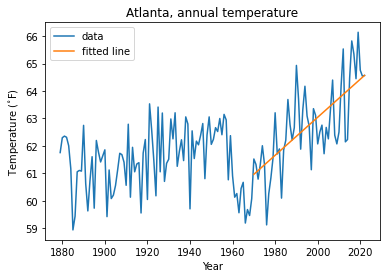

In [135]:
# make a plot
plt.plot(year,Annual,label='data') # plot the data

x=year[ind]
plt.plot(x,a*x+b,'-',label='fitted line') # plot the fitting line

plt.xlabel('Year')
plt.ylabel('Temperature ($^{\circ}$F)')
plt.title('Atlanta, annual temperature');
plt.legend()
plt.show()

### Part 3. Comparison of different cities

In [174]:
# % import data (replace missing values with NaN)

# Atlanta, GA
df1=pd.read_excel('./temperature_four_cities.xlsx',sheet_name='ATL').replace('M', np.nan)
# Boston, MA
df2=pd.read_excel('./temperature_four_cities.xlsx',sheet_name='BOS').replace('M', np.nan)
# San Francisco, CA
df3=pd.read_excel('./temperature_four_cities.xlsx',sheet_name='SFO').replace('M', np.nan)
# Seattle, WA
df4=pd.read_excel('./temperature_four_cities.xlsx',sheet_name='SEA').replace('M', np.nan)

df3

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,1894,47.7,48.4,50.6,54.9,55.2,NaN,56.4,59.2,63.2,59.6,59.4,49.6,54.9
1,1895,48.6,53.8,52.1,54.8,57.6,NaN,58.4,58.3,60.7,58.6,56.1,48.7,55.2
2,1896,52.3,55.3,54.3,51.7,56.3,NaN,59.4,59.3,59.7,58.9,53.5,52.7,55.8
3,1897,48.6,50.7,48.9,57.6,57.5,NaN,58.1,57.2,60.8,58.5,53.2,50.5,54.7
4,1898,46.7,52.7,51.2,54.6,52.6,NaN,56.1,57.0,58.9,61.2,55.4,49.7,54.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2018,54.4,55.5,54.7,56.3,57.2,59.8,60.5,60.5,60.4,62.3,59.1,54.0,57.9
125,2019,54.9,50.3,55.2,57.9,56.4,62.1,60.6,64.2,65.1,63.1,56.8,53.6,58.4
126,2020,52.8,56.4,54.5,56.5,60.3,61.3,60.4,62.9,65.5,65.2,56.1,53.4,58.8
127,2021,53.1,54.2,53.4,53.8,55.9,59.7,58.9,62.0,62.0,61.1,58.8,50.8,57.0


In [175]:
# year
year=df1.Year
T_feb1=df1.Feb
T_feb2=df2.Feb
T_feb3=df3.Feb
T_feb4=df4.Feb

# combine data into the same dataframe
T_feb = pd.concat([T_feb1,T_feb2,T_feb3,T_feb4],axis=1)
T_feb.columns=['ATL','BOS','SFO','SEA']

# assign year as index
T_feb.index=year
T_feb

,ATL,BOS,SFO,SEA
Year,,,,
1894,45.0,26.8,48.4,38.2
1895,34.4,25.4,53.8,44.7
1896,45.4,28.6,55.3,44.9
1897,47.7,30.9,50.7,42.2
1898,43.1,32.8,52.7,45.6
...,...,...,...,...
2018,57.3,38.1,55.5,41.4
2019,53.8,33.5,50.3,36.6
2020,49.9,37.8,56.4,43.6


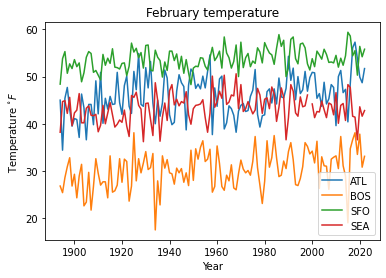

In [176]:
# make a time series plot
plt.plot(year,T_feb)
plt.legend(['ATL','BOS','SFO','SEA'])
plt.xlabel('Year')
plt.ylabel('Temperature $^{\circ}F$')
plt.title('February temperature')
plt.show()

In [172]:
# calculation of covariance and correlation
T_feb=T_feb.dropna()
# covariance matrix
c_mat=T_feb.cov()
print('Covariance matrix:')
print(c_mat) 

# correlation matrix
r_mat=T_feb.corr()
print('Correlation matrix:')
print(r_mat)

r_mat

Covariance matrix:
           ATL        BOS       SFO       SEA
ATL  19.590245  10.069850 -1.324636 -3.577175
BOS  10.069850  15.715974  0.006622 -0.007251
SFO  -1.324636   0.006622  5.312923  4.393219
SEA  -3.577175  -0.007251  4.393219  8.739537
Correlation matrix:
          ATL       BOS       SFO       SEA
ATL  1.000000  0.573895 -0.129840 -0.273386
BOS  0.573895  1.000000  0.000725 -0.000619
SFO -0.129840  0.000725  1.000000  0.644721
SEA -0.273386 -0.000619  0.644721  1.000000


,ATL,BOS,SFO,SEA
ATL,1.000000,0.573895,-0.129840,-0.273386
BOS,0.573895,1.000000,0.000725,-0.000619
SFO,-0.129840,0.000725,1.000000,0.644721
SEA,-0.273386,-0.000619,0.644721,1.000000


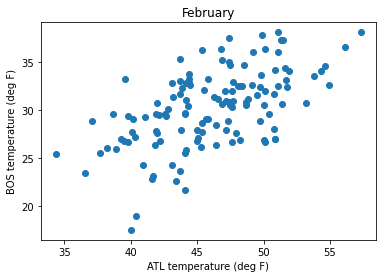

In [186]:
# correlation plot
# atlanta vs. boston
plt.plot(T_feb.ATL,T_feb.BOS,'o')
plt.xlabel('ATL temperature (deg F)')
plt.ylabel('BOS temperature (deg F)')
plt.title('February');
plt.show()

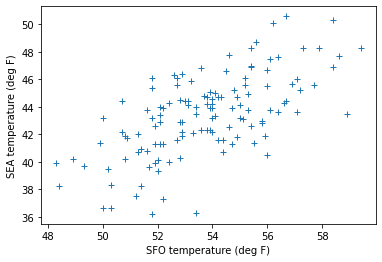

In [182]:
# correlation plot
# san francisco vs. seattle
plt.plot(T_feb.SFO,T_feb.SEA,'+')
plt.xlabel('SFO temperature (deg F)')
plt.ylabel('SEA temperature (deg F)')
plt.title('February');
plt.show()

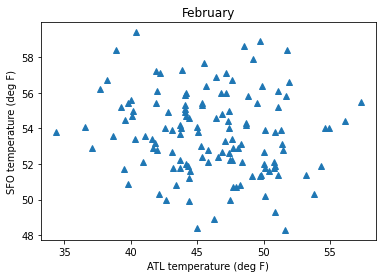

In [185]:
# correlation plot
# atlanta vs. san francisco 
plt.plot(T_feb.ATL,T_feb.SFO,'^')
plt.xlabel('ATL temperature (deg F)')
plt.ylabel('SFO temperature (deg F)')
plt.title('February');
plt.show()

In [196]:
# test the significance of correlation
N=len(T_feb) # number of rows in the df
t_value=r_mat*np.sqrt((N-2)/(1-r_mat**2))
print(t_value)

# critical t value for 95% confidence level (two tailed)

CL=0.95
alpha=1-CL
tcrit=stats.norm.ppf(1-alpha/2)
print('Critical t value is:')
print(tcrit)

          ATL       BOS       SFO       SEA
ATL       inf  7.897471 -1.475720 -3.202919
BOS  7.897471       inf  0.008166 -0.006973
SFO -1.475720  0.008166       inf  9.504799
SEA -3.202919 -0.006973  9.504799       inf
Critical t value is:
1.959963984540054
